In [1]:
import pandas as pd
import numpy as np
import re
import random
import matplotlib.pyplot as plt
import seaborn as sns
# import pandas_profiling as pp
# import folium
import json
# import pydeck as pdk
# import geopandas as gpd
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())
print ('설정 파일 위치: ', mpl.matplotlib_fname())
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체개수
print(len(font_list))
font_list_mac = fm.win32InstalledFonts()
print(len(font_list_mac))
f = [f.name for f in fm.fontManager.ttflist]
print(len(font_list))
# 10개의 폰트 명 만 출력
# print(fm.fontManager.ttflist)
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Gothic' in f.name]
path = 'C:\\WINDOWS\\Fonts\\malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
print(font_name)
plt.rc('font', family=font_name)

버전:  3.1.0
설치 위치:  c:\project\venv\dacon\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\dhkim\.matplotlib
캐시 위치:  C:\Users\dhkim\.matplotlib
설정 파일 위치:  c:\project\venv\dacon\lib\site-packages\matplotlib\mpl-data\matplotlibrc
367
372
367
Malgun Gothic


In [2]:
yp_df = pd.read_excel("../../data/moving_population/ingu_hour_yeungdeungpo.xlsx",sheet_name=0)

In [3]:
mp_df = pd.read_excel("../../data/moving_population/ingu_hour_mapo.xlsx",sheet_name=0)

In [6]:
ingu_var = [x for x in yp_df.columns if '_ingu' in x and len(x)>13]
print(len(ingu_var))
yp_df_2 = pd.melt(yp_df,['hour','latitude','longitude','gu_name','dong_name'],value_vars=ingu_var,var_name='성별연령대',value_name='인구')
yp_df_2.head()
yp_df_2['연령대'] = yp_df_2['성별연령대'].str.slice(stop=7)
yp_df_2['성별'] = yp_df_2['성별연령대'].str.slice(start=8)
yp_df_2 = yp_df_2.drop("성별연령대", axis=1)
yp_df_2['성별'] = yp_df_2.apply(lambda row:row['성별'].split('_')[0],axis=1)
yp_df_2.head()
mp_df_2 = pd.melt(mp_df,['hour','latitude','longitude','gu_name','dong_name'],value_vars=ingu_var,var_name='성별연령대',value_name='인구')
mp_df_2.head()
mp_df_2['연령대'] = mp_df_2['성별연령대'].str.slice(stop=7)
mp_df_2['성별'] = mp_df_2['성별연령대'].str.slice(start=8)
mp_df_2 = mp_df_2.drop("성별연령대", axis=1)
mp_df_2.head()
mp_df_2['성별'] = mp_df_2.apply(lambda row:row['성별'].split('_')[0],axis=1)
mp_df_2.head()

18


,hour,latitude,longitude,gu_name,dong_name,인구,연령대,성별
0,0,37.548776,126.951326,마포구,아현동,0.365343,under10,male
1,0,37.553301,126.955255,마포구,아현동,0.245545,under10,male
2,0,37.553755,126.955818,마포구,아현동,0.575684,under10,male
3,0,37.546512,126.949078,마포구,아현동,0.017785,under10,male
4,0,37.550584,126.952444,마포구,아현동,0.580266,under10,male


In [39]:
yp_groupby = yp_df_2[['hour','dong_name','성별','인구','연령대']].groupby(['hour','dong_name','성별','연령대'],as_index=False).sum()
mp_groupby = mp_df_2[['hour','dong_name','성별','인구','연령대']].groupby(['hour','dong_name','성별','연령대'],as_index=False).sum()

In [40]:
mp_groupby

,hour,dong_name,성별,연령대,인구
0,0,공덕동,female,under10,84.330540
1,0,공덕동,female,under20,570.252839
2,0,공덕동,female,under30,1402.246834
3,0,공덕동,female,under40,1655.072947
4,0,공덕동,female,under50,1501.265247
...,...,...,...,...,...
6907,23,합정동,male,under50,876.975598
6908,23,합정동,male,under60,703.893022
6909,23,합정동,male,under70,486.678346
6910,23,합정동,male,under80,265.883479


## 유출입 인구수 데이터로 변환

In [41]:
ypmp = pd.concat([yp_groupby,mp_groupby])
ypmp = ypmp.sort_values(['hour','dong_name','성별','연령대'])
ypmp_hour4 = ypmp[ypmp['hour']==4]
ypmp_hour4

,hour,dong_name,성별,연령대,인구
1152,4,공덕동,female,under10,81.468747
1153,4,공덕동,female,under20,566.531437
1154,4,공덕동,female,under30,1424.922038
1155,4,공덕동,female,under40,1640.766790
1156,4,공덕동,female,under50,1469.019713
...,...,...,...,...,...
1435,4,합정동,male,under50,796.918521
1436,4,합정동,male,under60,644.928167
1437,4,합정동,male,under70,452.933330
1438,4,합정동,male,under80,248.162538


In [43]:
ypmp_move_wrt4 = ypmp.copy()
diffs = []
length = ypmp_hour4.shape[0]
length
print(ypmp.shape[0],length*24)
for i in range(24):
    diff = np.array(ypmp_move_wrt4.iloc[i*length:(i+1)*length,4]) - np.array(ypmp_hour4['인구'])
# #     print(diff)
    diffs.append(diff)
concated = np.concatenate(diffs)
ypmp_move_wrt4.loc[:,'인구'] = concated
ypmp_move_wrt4

14688 14688


,hour,dong_name,성별,연령대,인구
0,0,공덕동,female,under10,2.861793
1,0,공덕동,female,under20,3.721402
2,0,공덕동,female,under30,-22.675204
3,0,공덕동,female,under40,14.306157
4,0,공덕동,female,under50,32.245534
...,...,...,...,...,...
6907,23,합정동,male,under50,80.057077
6908,23,합정동,male,under60,58.964855
6909,23,합정동,male,under70,33.745015
6910,23,합정동,male,under80,17.720941


In [45]:
ypmp_move_wrt4[ypmp_move_wrt4['hour']==4]

,hour,dong_name,성별,연령대,인구
1152,4,공덕동,female,under10,0.0
1153,4,공덕동,female,under20,0.0
1154,4,공덕동,female,under30,0.0
1155,4,공덕동,female,under40,0.0
1156,4,공덕동,female,under50,0.0
...,...,...,...,...,...
1435,4,합정동,male,under50,0.0
1436,4,합정동,male,under60,0.0
1437,4,합정동,male,under70,0.0
1438,4,합정동,male,under80,0.0


In [47]:
ingu_18to20 = ypmp_move_wrt4[(ypmp_move_wrt4['hour']>=18)&(ypmp_move_wrt4['hour']<21)]
ingu_21to23 = ypmp_move_wrt4[(ypmp_move_wrt4['hour']>=21)&(ypmp_move_wrt4['hour']<24)]

In [57]:
ingu_18to20_age20 = ingu_18to20[ingu_18to20['연령대']=='under30']
ingu_18to20_age30 = ingu_18to20[ingu_18to20['연령대']=='under40']
ingu_18to20_age20_value = ingu_18to20_age20.groupby(['dong_name','성별'],as_index=False).sum()
ingu_18to20_age30_value = ingu_18to20_age30.groupby(['dong_name','성별'],as_index=False).sum()
ingu_18to20_age20_value

,dong_name,성별,hour,인구
0,공덕동,female,57,-1203.997347
1,공덕동,male,57,-531.494187
2,당산1동,female,57,-58.159521
3,당산1동,male,57,229.757724
4,당산2동,female,57,180.474633
...,...,...,...,...
63,영등포본동,male,57,662.363209
64,용강동,female,57,217.306536
65,용강동,male,57,180.254116
66,합정동,female,57,2138.772316


In [56]:
ingu_21to23_age20 = ingu_21to23[ingu_21to23['연령대']=='under30']
ingu_21to23_age30 = ingu_21to23[ingu_21to23['연령대']=='under40']
ingu_21to23_age20_value = ingu_21to23_age20.groupby(['dong_name','성별'],as_index=False).sum()
ingu_21to23_age30_value = ingu_21to23_age30.groupby(['dong_name','성별'],as_index=False).sum()
ingu_21to23_age20_value

,dong_name,성별,hour,인구
0,공덕동,female,66,-990.333739
1,공덕동,male,66,-530.060222
2,당산1동,female,66,18.180532
3,당산1동,male,66,195.344892
4,당산2동,female,66,-171.722300
...,...,...,...,...
63,영등포본동,male,66,394.055505
64,용강동,female,66,-29.299570
65,용강동,male,66,113.383008
66,합정동,female,66,1102.675499


In [66]:
def get_ratio(df):
    female = np.abs(np.array(df[df['성별']=='female']['인구']))
    male = np.abs(np.array(df[df['성별']=='male']['인구']))
    f_ratio = female / (female + male)
    return f_ratio

ingu_18to20_age30_ratio = get_ratio(ingu_18to20_age30_value)
ingu_18to20_age20_ratio = get_ratio(ingu_18to20_age20_value)
ingu_21to23_age30_ratio = get_ratio(ingu_21to23_age30_value)
ingu_21to23_age20_ratio = get_ratio(ingu_21to23_age20_value)

In [122]:
features = ingu_21to23_age20_value[ingu_21to23_age20_value['성별']=='female'][['dong_name']]
features =  features.rename(columns={'dong_name':'행정동'})
features['index'] = range(34)
features = features.set_index('index')
# np.array(ingu_18to20_age20_value.groupby('dong_name').sum()['인구'])
features['18~21시,20대 인구수'] = np.array(ingu_18to20_age20_value.groupby('dong_name').sum()['인구'])
# features['18~21시,20대 여성'] = np.array(ingu_18to20_age20_value[ingu_18to20_age20_value['성별']=='female'].groupby('dong_name').sum()['인구'])
# features['18~21시,20대 남성'] = np.array(ingu_18to20_age20_value[ingu_18to20_age20_value['성별']=='male'].groupby('dong_name').sum()['인구'])

features['18~21시,20대 성비'] = np.array(ingu_18to20_age20_ratio)
features['18~21시,30대 인구수'] = np.array(ingu_18to20_age30_value.groupby('dong_name').sum()['인구'])
# features['18~21시,30대 여성'] = np.array(ingu_18to20_age30_value[ingu_18to20_age30_value['성별']=='female'].groupby('dong_name').sum()['인구'])
# features['18~21시,30대 남성'] = np.array(ingu_18to20_age30_value[ingu_18to20_age30_value['성별']=='male'].groupby('dong_name').sum()['인구'])

features['18~21시,30대 성비'] = np.array(ingu_18to20_age30_ratio)
features['21~24시,20대 인구수'] = np.array(ingu_21to23_age20_value.groupby('dong_name').sum()['인구'])
# features['21~24시,20대 여성'] = np.array(ingu_21to23_age20_value[ingu_21to23_age20_value['성별']=='female'].groupby('dong_name').sum()['인구'])
# features['21~24시,20대 남성'] = np.array(ingu_21to23_age20_value[ingu_21to23_age20_value['성별']=='male'].groupby('dong_name').sum()['인구'])

features['21~24시,30대 인구수'] = np.array(ingu_21to23_age30_value.groupby('dong_name').sum()['인구'])
# features['21~24시,30대 여성'] = np.array(ingu_21to23_age30_value[ingu_21to23_age30_value['성별']=='female'].groupby('dong_name').sum()['인구'])
# features['21~24시,30대 남성'] = np.array(ingu_21to23_age30_value[ingu_21to23_age30_value['성별']=='male'].groupby('dong_name').sum()['인구'])

features

,행정동,"18~21시,20대 인구수","18~21시,20대 성비","18~21시,30대 인구수","18~21시,30대 성비","21~24시,20대 인구수","21~24시,30대 인구수"
index,,,,,,,
0,공덕동,-1735.491533,0.693750,-1552.214218,0.549822,-1520.393961,-1393.440845
1,당산1동,171.598204,0.202001,285.745013,0.029824,213.525424,-237.223362
2,당산2동,1029.285239,0.175340,1394.865360,0.267401,469.305312,0.114420
3,대림1동,-572.796637,0.496698,-463.007268,0.310382,-489.254847,-356.198387
4,대림2동,-475.183183,0.502127,-170.925480,0.541257,-268.377608,-81.247584
5,대림3동,-501.307661,0.513729,-691.839562,0.556018,-164.584642,-423.223853
6,대흥동,969.761216,0.401302,581.030702,0.302256,-1211.555673,-301.408720
7,도림동,-874.257624,0.592729,-1251.062943,0.463606,-493.428103,-794.010635
8,도화동,557.801761,0.343217,613.540201,0.147664,425.860034,97.564368


In [116]:
corr = features.corr()
feature_hour = features[['18~21시,20대 인구수','18~21시,30대 인구수','21~24시,20대 인구수','21~24시,30대 인구수']]
feature_20 = features[['18~21시,20대 인구수','21~24시,20대 인구수']]
feautre_30 = features[['18~21시,30대 인구수','21~24시,30대 인구수']]
corr
corr_hour = feature_hour.corr()
corr_20 = feature_20.corr()
corr_30 = feautre_30.corr()

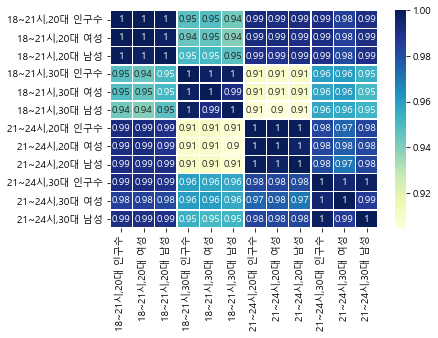

In [118]:
snsplt = sns.heatmap(corr,annot=True,cmap="YlGnBu", linewidths=.5)


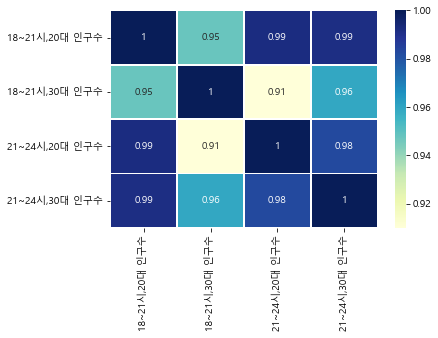

In [119]:
snsplt = sns.heatmap(corr_hour,annot=True,cmap="YlGnBu", linewidths=.5)


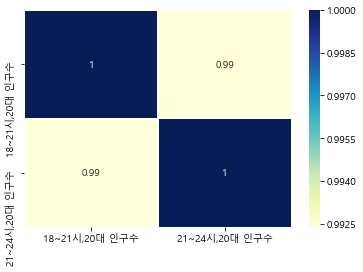

In [120]:
snsplt = sns.heatmap(corr_20,annot=True,cmap="YlGnBu", linewidths=.5)


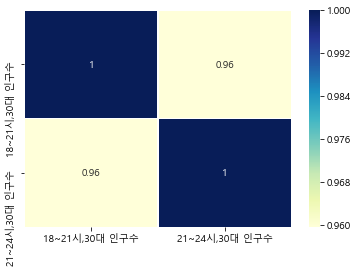

In [121]:
snsplt = sns.heatmap(corr_30,annot=True,cmap="YlGnBu", linewidths=.5)

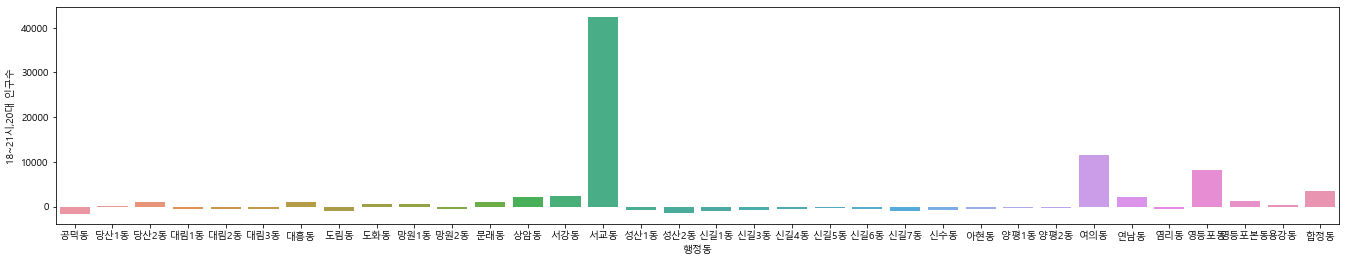

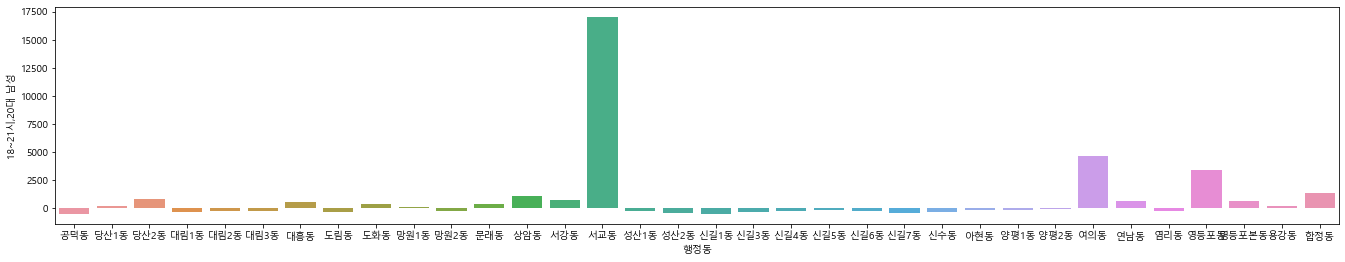

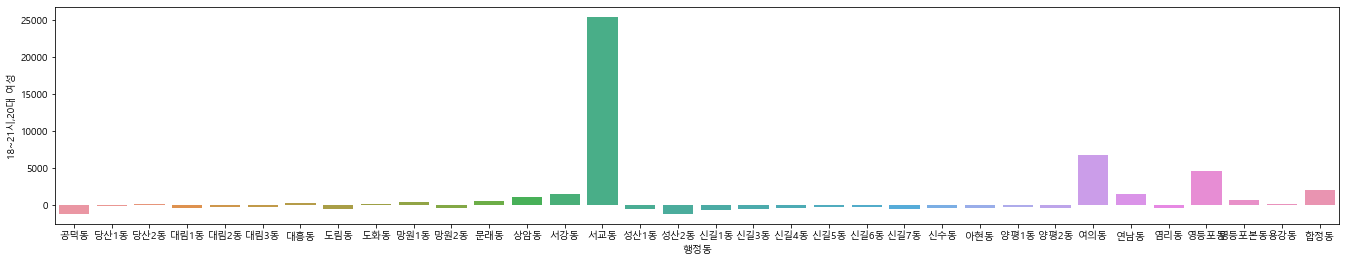

In [109]:
plt.figure(figsize=(23,4))
sns.barplot(data=features,x='행정동',y='18~21시,20대 인구수')
plt.figure(figsize=(23,4))
sns.barplot(data=features,x='행정동',y='18~21시,20대 남성')
plt.figure(figsize=(23,4))
sns.barplot(data=features,x='행정동',y='18~21시,20대 여성')

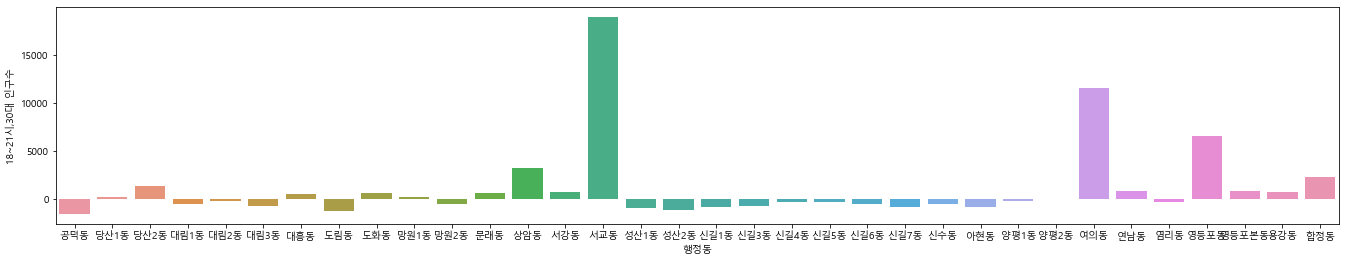

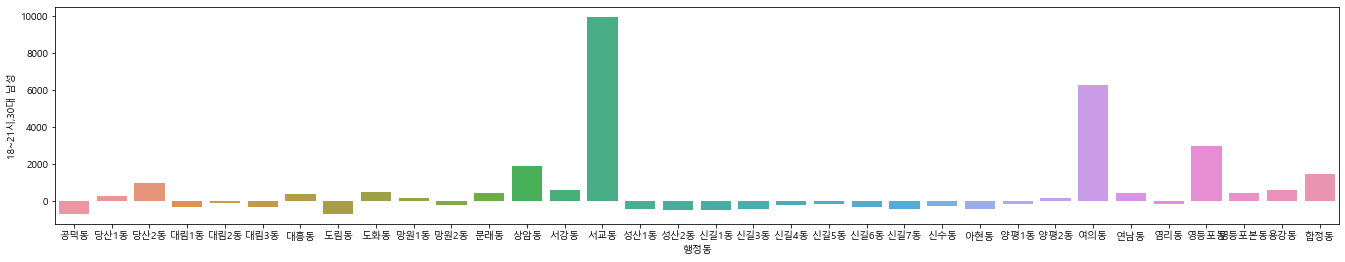

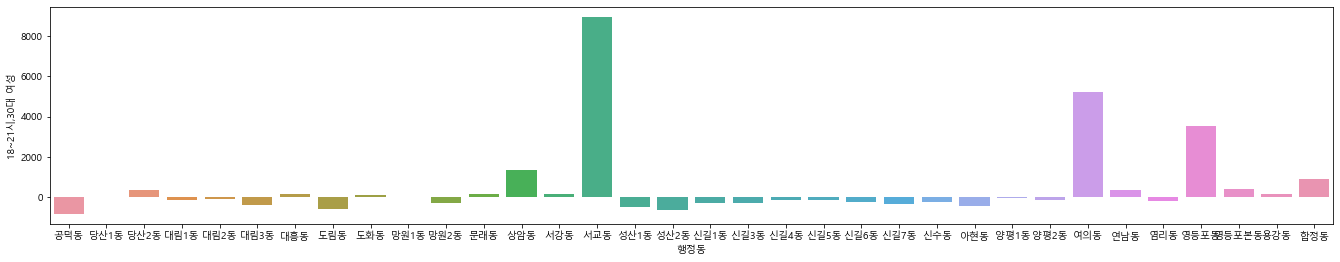

In [110]:
plt.figure(figsize=(23,4))
sns.barplot(data=features,x='행정동',y='18~21시,30대 인구수')
plt.figure(figsize=(23,4))
sns.barplot(data=features,x='행정동',y='18~21시,30대 남성')
plt.figure(figsize=(23,4))
sns.barplot(data=features,x='행정동',y='18~21시,30대 여성')

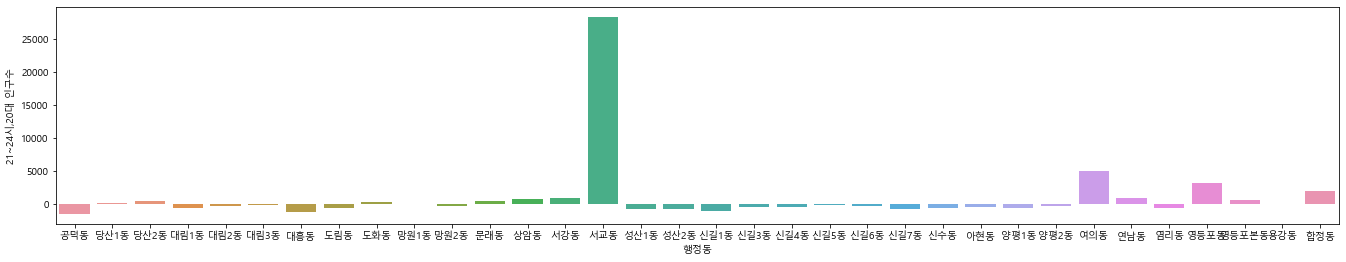

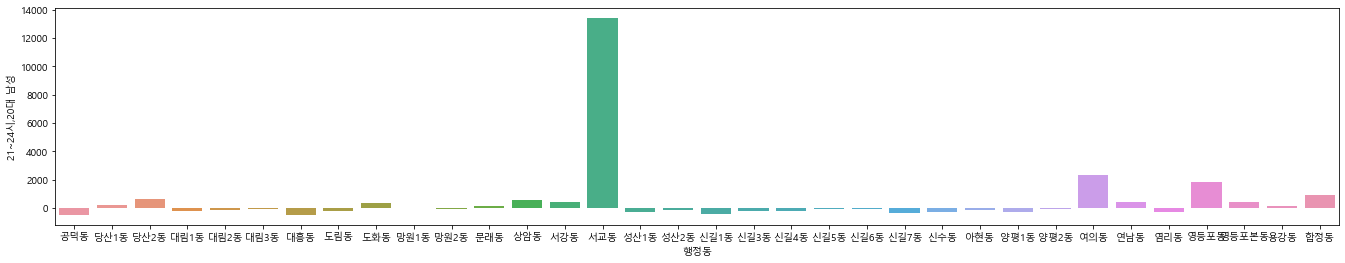

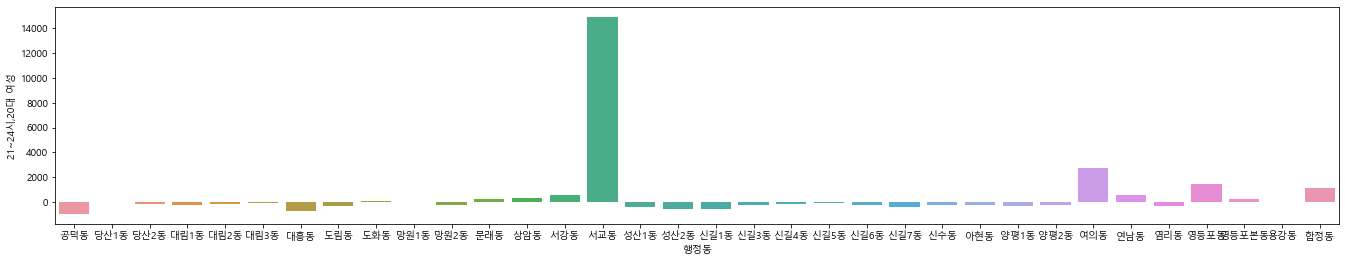

In [112]:
plt.figure(figsize=(23,4))
sns.barplot(data=features,x='행정동',y='21~24시,20대 인구수')
plt.figure(figsize=(23,4))
sns.barplot(data=features,x='행정동',y='21~24시,20대 남성')
plt.figure(figsize=(23,4))
sns.barplot(data=features,x='행정동',y='21~24시,20대 여성')

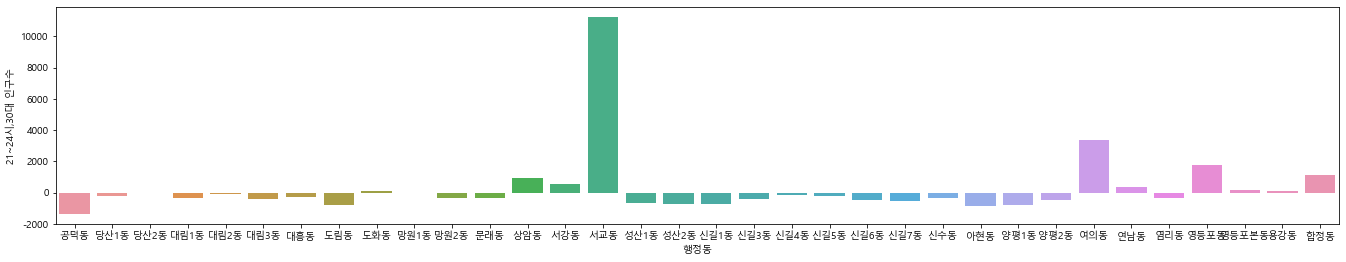

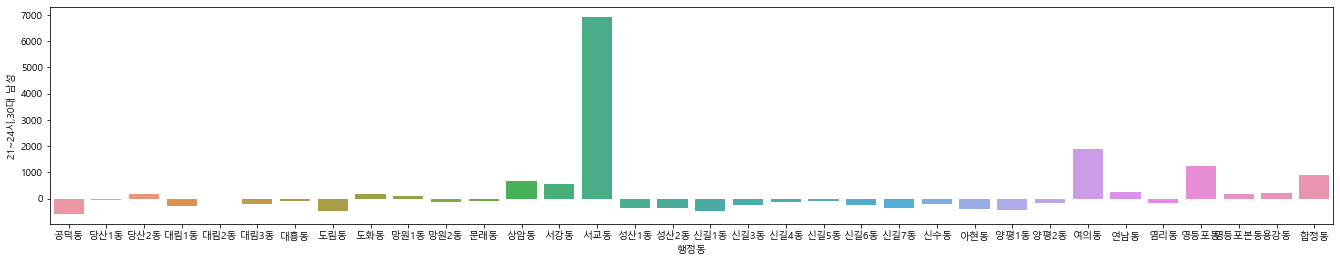

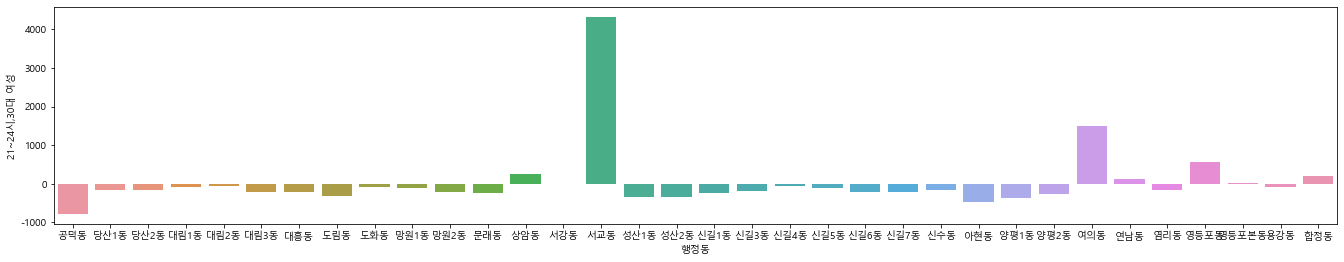

In [113]:

plt.figure(figsize=(23,4))
sns.barplot(data=features,x='행정동',y='21~24시,30대 인구수')

plt.figure(figsize=(23,4))
sns.barplot(data=features,x='행정동',y='21~24시,30대 남성')

plt.figure(figsize=(23,4))
sns.barplot(data=features,x='행정동',y='21~24시,30대 여성')